Data Cleaning/Data Preprocessing Before Building a Model - A Comprehensive Guide

by Ankith https://www.youtube.com/watch?v=GP-2634exqA&list=LL&index=5

Data preprocessing is an important step for building machine learning models

Steps:

1. import necessary library
2. read dataset
3. sanity check of data
4. exploratory data analysis
5. Missing value treatment
6. Outliers treatment
7. Duplicates and garbage value treatment
8. Normalization
9. Encoding of data

## step1  import libraries

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Step 2 import data

In [5]:
data = pd.read_csv("fundamentals.csv",index_col =0,parse_dates=True)
data.head()

C:\Users\lionel\AppData\Local\Temp\ipykernel_19448\1163275744.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv("fundamentals.csv",index_col =0,parse_dates=True)


,Ticker Symbol,Period Ending,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,Cash and Cash Equivalents,...,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
0,AAL,2012-12-31,3.068000e+09,-222000000.0,-1.961000e+09,23.0,-1.888000e+09,4.695000e+09,53.0,1.330000e+09,...,7.072000e+09,9.011000e+09,-7.987000e+09,2.489100e+10,1.690400e+10,2.485500e+10,-367000000.0,2012.0,-5.60,3.350000e+08
1,AAL,2013-12-31,4.975000e+09,-93000000.0,-2.723000e+09,67.0,-3.114000e+09,1.059200e+10,75.0,2.175000e+09,...,1.432300e+10,1.380600e+10,-2.731000e+09,4.500900e+10,4.227800e+10,2.674300e+10,0.0,2013.0,-11.25,1.630222e+08
2,AAL,2014-12-31,4.668000e+09,-160000000.0,-1.500000e+08,143.0,-5.311000e+09,1.513500e+10,60.0,1.768000e+09,...,1.175000e+10,1.340400e+10,2.021000e+09,4.120400e+10,4.322500e+10,4.265000e+10,0.0,2014.0,4.02,7.169154e+08
3,AAL,2015-12-31,5.102000e+09,352000000.0,-7.080000e+08,135.0,-6.151000e+09,1.159100e+10,51.0,1.085000e+09,...,9.985000e+09,1.360500e+10,5.635000e+09,4.278000e+10,4.841500e+10,4.099000e+10,0.0,2015.0,11.39,6.681299e+08
4,AAP,2012-12-29,2.409453e+09,-89482000.0,6.000000e+05,32.0,-2.711820e+08,5.202150e+08,23.0,5.981110e+08,...,3.184200e+09,2.559638e+09,1.210694e+09,3.403120e+09,4.613814e+09,6.205003e+09,-27095000.0,2012.0,5.29,7.328355e+07


In [6]:
data1 = pd.read_csv("prices-split-adjusted.csv",index_col=0,parse_dates=True)
data1.head()

,symbol,open,close,low,high,volume
date,,,,,,
2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [5]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 851264 entries, 2016-01-05 to 2016-12-30
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   symbol  851264 non-null  object 
 1   open    851264 non-null  float64
 2   close   851264 non-null  float64
 3   low     851264 non-null  float64
 4   high    851264 non-null  float64
 5   volume  851264 non-null  float64
dtypes: float64(5), object(1)
memory usage: 45.5+ MB


## Step 3 - sanity check of data

3.1 - shape (attribute) and info (method) of data
3.2 - finding missing values using isnull
3.3 - finding duplicates
3.4 - finding garbage values

In [6]:
data.shape


(1781, 78)

In [7]:
data.info(0)

<class 'pandas.core.frame.DataFrame'>
Index: 1781 entries, 0 to 1780
Data columns (total 78 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Ticker Symbol                                        1781 non-null   object 
 1   Period Ending                                        1781 non-null   object 
 2   Accounts Payable                                     1781 non-null   float64
 3   Accounts Receivable                                  1781 non-null   float64
 4   Add'l income/expense items                           1781 non-null   float64
 5   After Tax ROE                                        1781 non-null   float64
 6   Capital Expenditures                                 1781 non-null   float64
 7   Capital Surplus                                      1781 non-null   float64
 8   Cash Ratio                                           1482 non-null   floa

In [8]:
#WTF missing values

data1.isnull().sum()

symbol    0
open      0
close     0
low       0
high      0
volume    0
dtype: int64

In [9]:
#WTF missing values

data.isnull().sum()

Ticker Symbol                     0
Period Ending                     0
Accounts Payable                  0
Accounts Receivable               0
Add'l income/expense items        0
                               ... 
Total Revenue                     0
Treasury Stock                    0
For Year                        173
Earnings Per Share              219
Estimated Shares Outstanding    219
Length: 78, dtype: int64

In [10]:
#WTF missing values by percentage

data.isnull().sum() / data.shape[0] *100

Ticker Symbol                    0.000000
Period Ending                    0.000000
Accounts Payable                 0.000000
Accounts Receivable              0.000000
Add'l income/expense items       0.000000
                                  ...    
Total Revenue                    0.000000
Treasury Stock                   0.000000
For Year                         9.713644
Earnings Per Share              12.296463
Estimated Shares Outstanding    12.296463
Length: 78, dtype: float64

In [11]:
### finding duplicates

data.duplicated().sum()

0

In [12]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1776    False
1777    False
1778    False
1779    False
1780    False
Length: 1781, dtype: bool

In [13]:
## garbage values for qualitative /  non-quantitative data
for i in data.select_dtypes(include = "object").columns:
    print(data[i].value_counts())
    print("*"*10)

Ticker Symbol
AAL     4
NOV     4
OMC     4
OKE     4
O       4
       ..
PYPL    3
WRK     3
AVGO    2
MYL     2
CSRA    2
Name: count, Length: 448, dtype: int64
**********
Period Ending
2014-12-31    317
2015-12-31    317
2013-12-31    316
2012-12-31    225
2016-12-31     97
             ... 
2007-02-28      1
2006-02-28      1
2004-06-30      1
2003-06-30      1
2013-10-03      1
Name: count, Length: 162, dtype: int64
**********


In [14]:
data["Ticker Symbol"].value_counts()

Ticker Symbol
AAL     4
NOV     4
OMC     4
OKE     4
O       4
       ..
PYPL    3
WRK     3
AVGO    2
MYL     2
CSRA    2
Name: count, Length: 448, dtype: int64

### step 4 EDA

In [15]:
data.describe()

,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,Cash and Cash Equivalents,Changes in Inventories,Common Stocks,...,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
count,1.781000e+03,1.781000e+03,1.781000e+03,1781.000000,1.781000e+03,1.781000e+03,1482.000000,1.781000e+03,1.781000e+03,1.781000e+03,...,1.781000e+03,1.781000e+03,1.781000e+03,1.781000e+03,1.781000e+03,1.781000e+03,1.781000e+03,1608.000000,1562.000000,1.562000e+03
mean,4.673418e+09,-6.353484e+07,6.908940e+07,43.601348,-1.251925e+09,5.351784e+09,74.457490,8.521399e+09,-6.787749e+07,1.608543e+09,...,6.726349e+09,4.699919e+09,1.188846e+10,4.380420e+10,5.569266e+10,2.029154e+10,-3.951522e+09,2013.305348,3.353707,6.024244e+08
std,1.406047e+10,7.562794e+08,6.848143e+08,233.924028,2.979963e+09,1.133977e+10,102.298374,5.432105e+10,3.903369e+08,9.177636e+09,...,1.344800e+10,9.538832e+09,2.584429e+10,1.817039e+11,2.033612e+11,4.095355e+10,1.407047e+10,19.953135,4.695896,1.142585e+09
min,0.000000e+00,-6.452000e+09,-6.768000e+09,0.000000,-3.798500e+10,-7.215000e+08,0.000000,2.100000e+04,-5.562000e+09,0.000000e+00,...,0.000000e+00,0.000000e+00,-1.324400e+10,2.577000e+06,2.705000e+06,1.514000e+06,-2.297340e+11,1215.000000,-61.200000,-1.513945e+09
25%,5.160000e+08,-1.040000e+08,-2.638000e+06,10.000000,-1.151200e+09,4.791000e+08,17.000000,3.088000e+08,-5.400000e+07,1.628000e+06,...,1.044178e+09,5.640760e+08,2.201492e+09,3.843300e+09,6.552689e+09,3.714000e+09,-3.040895e+09,2013.000000,1.590000,1.493318e+08
50%,1.334000e+09,-1.830000e+07,2.000000e+06,16.000000,-3.580000e+08,1.997080e+09,41.000000,8.625900e+08,0.000000e+00,7.725000e+06,...,2.747200e+09,1.701500e+09,4.983000e+09,9.141000e+09,1.517000e+10,8.023200e+09,-3.068350e+08,2014.000000,2.810000,2.929409e+08
75%,3.246000e+09,7.816000e+06,3.359200e+07,26.000000,-1.291000e+08,5.735000e+09,90.000000,2.310000e+09,0.000000e+00,2.970000e+08,...,6.162000e+09,4.381000e+09,1.080900e+10,2.389700e+10,3.599710e+10,1.748600e+10,0.000000e+00,2015.000000,4.590000,5.492163e+08
max,2.069390e+11,2.266400e+10,1.416200e+10,5789.000000,5.000000e+06,1.082880e+11,1041.000000,7.281110e+11,3.755000e+09,1.581420e+11,...,1.396600e+11,9.028100e+10,2.562050e+11,2.340547e+12,2.572274e+12,4.856510e+11,0.000000e+00,2016.000000,50.090000,1.610769e+10


In [16]:
data.describe(include = 'object')

,Ticker Symbol,Period Ending
count,1781,1781
unique,448,162
top,AAL,2014-12-31
freq,4,317


c:\Users\lionel\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


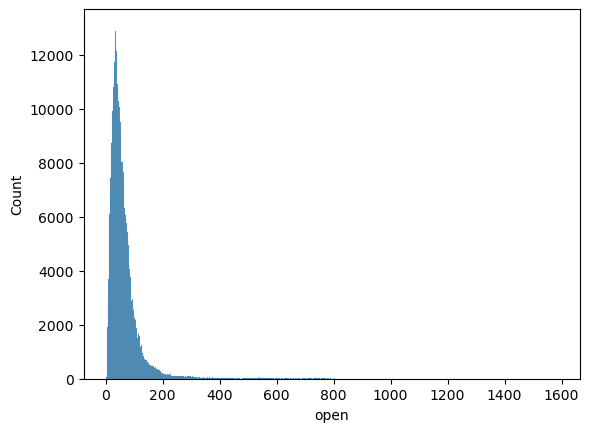

c:\Users\lionel\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


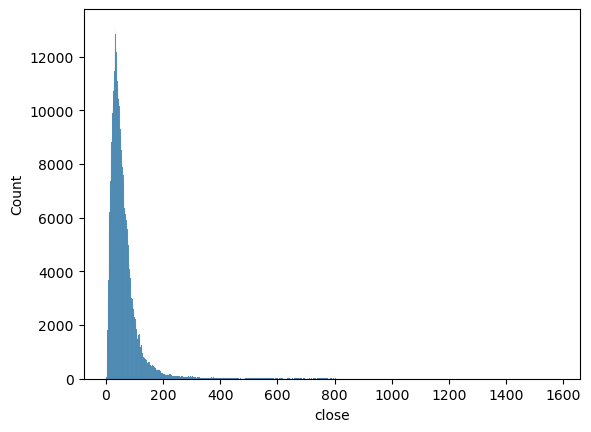

c:\Users\lionel\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


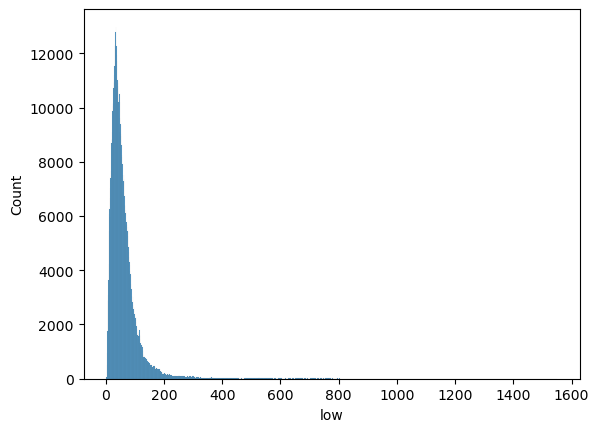

c:\Users\lionel\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


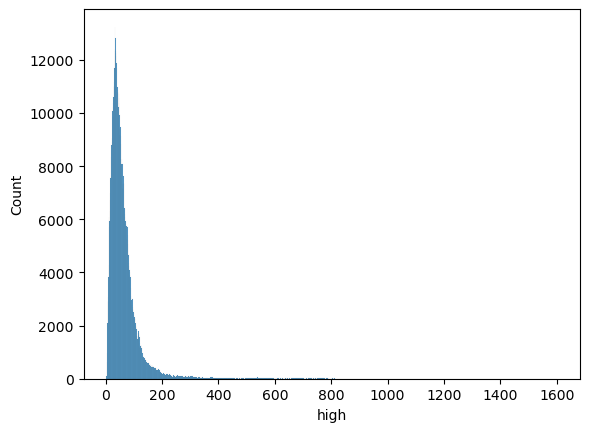

c:\Users\lionel\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


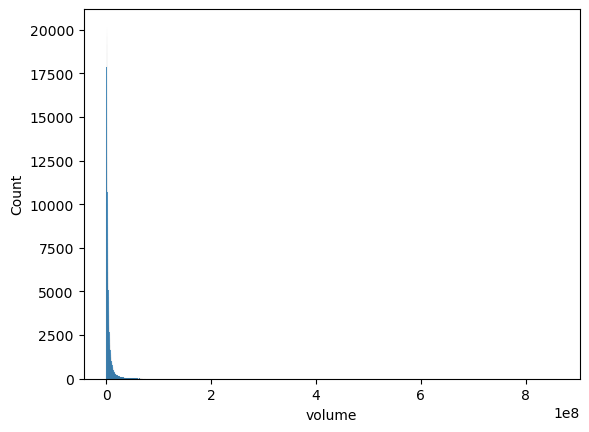

In [18]:
# histogram

for i in data1.select_dtypes(include = "number").columns:
    sns.histplot(data=data1,x=i)
    plt.show()



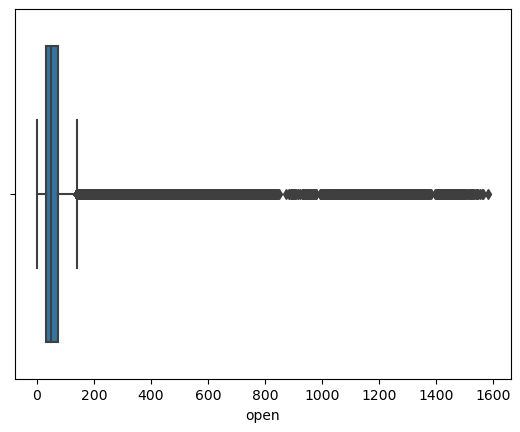

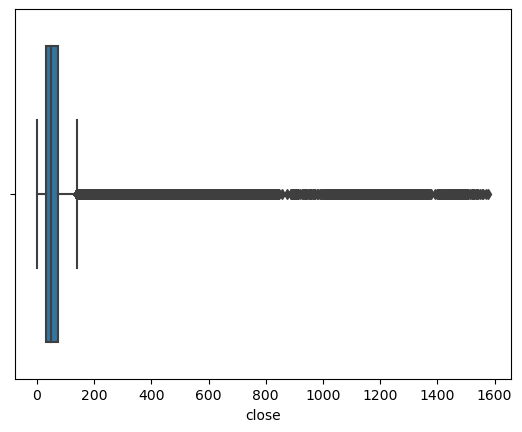

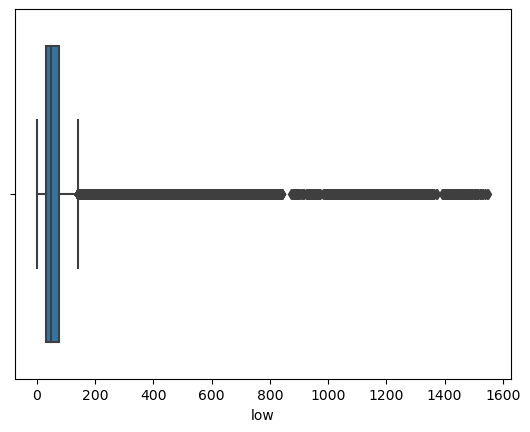

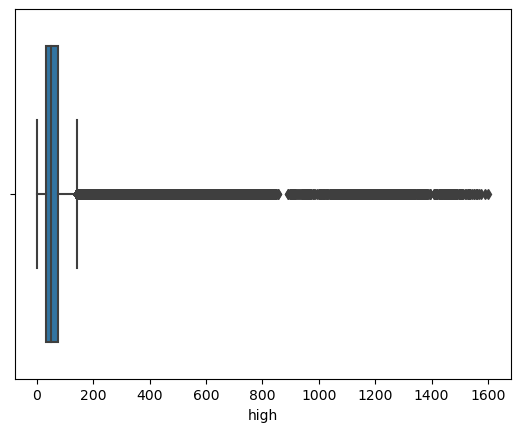

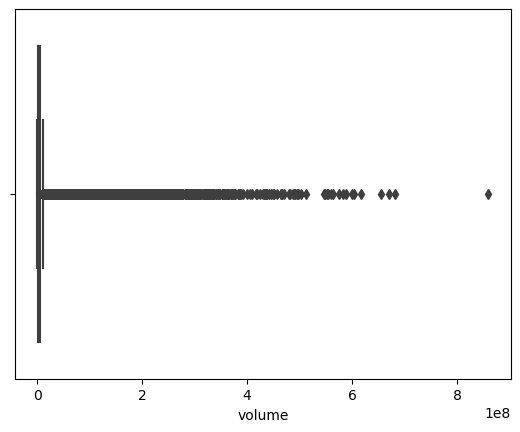

In [19]:
# Boxplot

for i in data1.select_dtypes(include = "number").columns:
    sns.boxplot(data=data1,x=i)
    plt.show()

In [22]:
#scatter plot

data.select_dtypes(include = "number").columns

Index(['Accounts Payable', 'Accounts Receivable', 'Add'l income/expense items',
       'After Tax ROE', 'Capital Expenditures', 'Capital Surplus',
       'Cash Ratio', 'Cash and Cash Equivalents', 'Changes in Inventories',
       'Common Stocks', 'Cost of Revenue', 'Current Ratio',
       'Deferred Asset Charges', 'Deferred Liability Charges', 'Depreciation',
       'Earnings Before Interest and Tax', 'Earnings Before Tax',
       'Effect of Exchange Rate',
       'Equity Earnings/Loss Unconsolidated Subsidiary', 'Fixed Assets',
       'Goodwill', 'Gross Margin', 'Gross Profit', 'Income Tax',
       'Intangible Assets', 'Interest Expense', 'Inventory', 'Investments',
       'Liabilities', 'Long-Term Debt', 'Long-Term Investments',
       'Minority Interest', 'Misc. Stocks', 'Net Borrowings', 'Net Cash Flow',
       'Net Cash Flow-Operating', 'Net Cash Flows-Financing',
       'Net Cash Flows-Investing', 'Net Income', 'Net Income Adjustments',
       'Net Income Applicable to Common Sha

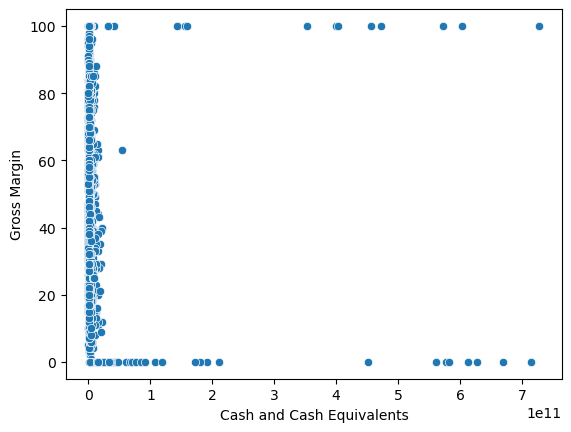

In [32]:
#scatter plot 1 variable


sns.scatterplot(data = data, x = "Cash and Cash Equivalents",y="Gross Margin")
plt.show()

In [34]:
#correlation heatmap

data1.select_dtypes(include = "number").corr()

,open,close,low,high,volume
open,1.000000,0.999845,0.999914,0.999928,-0.132526
close,0.999845,1.000000,0.999926,0.999925,-0.132675
low,0.999914,0.999926,1.000000,0.999889,-0.133087
high,0.999928,0.999925,0.999889,1.000000,-0.132168
volume,-0.132526,-0.132675,-0.133087,-0.132168,1.000000


<Axes: >

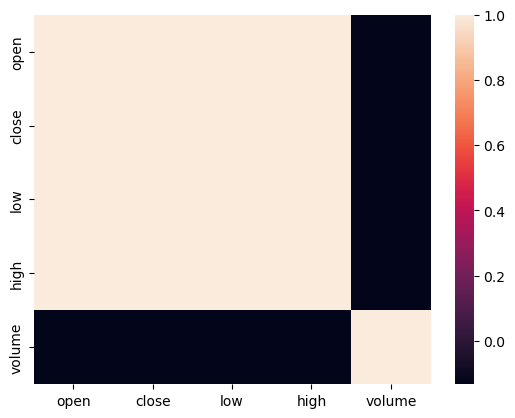

In [35]:
s = data1.select_dtypes(include = "number").corr()
sns.heatmap(s)

## Handling missing values

we have the option of filling with mean, median, mode of KNNiputer

In [36]:
#WTF missing values

data.isnull().sum()

Ticker Symbol                     0
Period Ending                     0
Accounts Payable                  0
Accounts Receivable               0
Add'l income/expense items        0
                               ... 
Total Revenue                     0
Treasury Stock                    0
For Year                        173
Earnings Per Share              219
Estimated Shares Outstanding    219
Length: 78, dtype: int64

In [38]:
for i in ["For Year","Earnings Per Share","Estimated Shares Outstanding" ] :
    data[i].fillna(data[i].median(), inplace= True)
    
data.isnull().sum()

C:\Users\lionel\AppData\Local\Temp\ipykernel_17916\937357768.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[i].fillna(data[i].median(), inplace= True)


Ticker Symbol                   0
Period Ending                   0
Accounts Payable                0
Accounts Receivable             0
Add'l income/expense items      0
                               ..
Total Revenue                   0
Treasury Stock                  0
For Year                        0
Earnings Per Share              0
Estimated Shares Outstanding    0
Length: 78, dtype: int64

In [39]:
## replace median with mean

In [42]:
from sklearn.impute import KNNImputer
impute = KNNImputer()

data = pd.read_csv("fundamentals.csv",index_col =0,parse_dates=True)

for i in ["For Year","Earnings Per Share","Estimated Shares Outstanding" ] :
    data[i]=impute.fit_transform(data[[i]])
    
    
    ## find out what is impute
    

C:\Users\lionel\AppData\Local\Temp\ipykernel_17916\3682812403.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv("fundamentals.csv",index_col =0,parse_dates=True)


In [43]:
data.isnull().sum()

Ticker Symbol                   0
Period Ending                   0
Accounts Payable                0
Accounts Receivable             0
Add'l income/expense items      0
                               ..
Total Revenue                   0
Treasury Stock                  0
For Year                        0
Earnings Per Share              0
Estimated Shares Outstanding    0
Length: 78, dtype: int64

## outliers treatment

In [2]:
def wisker(col):
    q1,q3 =np.percentile(col,[25,75])
    iqr = q3-q1
    lw = q1 = 1.5*iqr
    uw = q3 + 1.5*iqr
    return lw,uw


In [7]:
#return lower wisker and upper wisker

wisker(data1["volume"])

(6001500.0, 11224000.0)

#### Is there a package that can immediately get the outliers

## Duplicates and garbage value treatment

In [9]:
data1.drop_duplicates()

,symbol,open,close,low,high,volume
date,,,,,,
2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0
...,...,...,...,...,...,...
2016-12-30,ZBH,103.309998,103.199997,102.849998,103.930000,973800.0
2016-12-30,ZION,43.070000,43.040001,42.689999,43.310001,1938100.0
2016-12-30,ZTS,53.639999,53.529999,53.270000,53.740002,1701200.0


## Normalization

In [ ]:
# refer to Datanormalization.ipynb